In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Titanic/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Loading and Exploration:

In [ ]:
#printing few top rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#checking null values
print(df.isnull().sum())
print(df.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [ ]:
#deleting null values
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
(183, 12)


In [ ]:
print("Mean of ages: ",df['Age'].mean())
print("Median of ages: ",df['Age'].median())
print("Std dev of ages: ",df['Age'].std())
print()
print("Mean of fares: ",df['Fare'].mean())
print("Median of fares: ",df['Fare'].median())
print("Std dev of fares: ",df['Fare'].std())

Mean of ages:  35.6744262295082
Median of ages:  36.0
Std dev of ages:  15.643865966849717

Mean of fares:  78.68246885245901
Median of fares:  57.0
Std dev of fares:  76.3478427004057


# Data Visualization with Matplotlib:

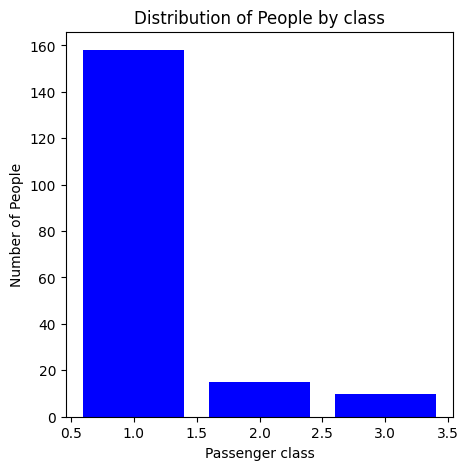

In [ ]:
#bar chart

vis= df['Pclass'].value_counts()
plt.figure(figsize=(5, 5))
plt.bar(vis.index, vis.values, color='blue')

plt.xlabel('Passenger class')
plt.ylabel('Number of People')
plt.title('Distribution of People by class')

plt.show()

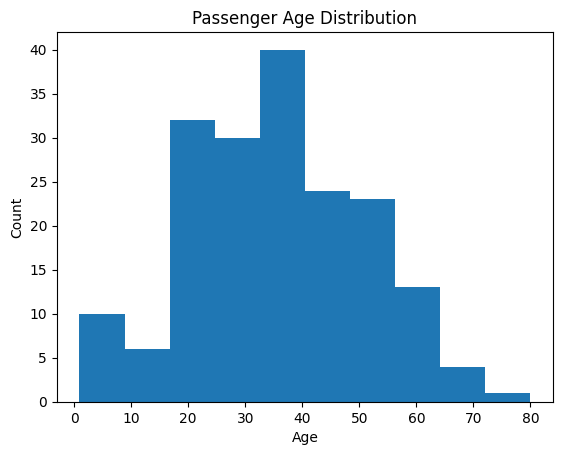

In [ ]:
#histogram

plt.hist(df['Age'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')

plt.show()

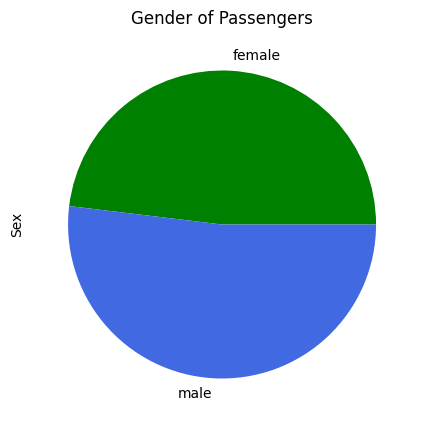

In [ ]:
#pie chart

vis=df["Sex"].value_counts(ascending=True)
vis.plot(
    kind="pie", figsize=(10, 5), title="Gender of Passengers",colors=["green", "royalblue"]
)
plt.show()

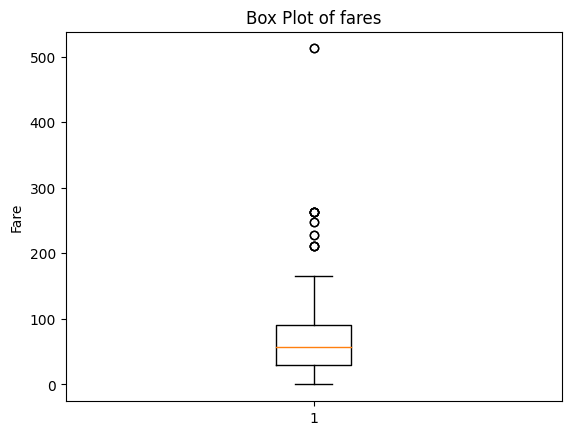

In [ ]:
plt.boxplot(df['Fare'])
plt.title("Box Plot of fares")
plt.ylabel("Fare")
plt.show()

# Data Visualization with Seaborn:

<ipython-input-12-b0bd1d3a49a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


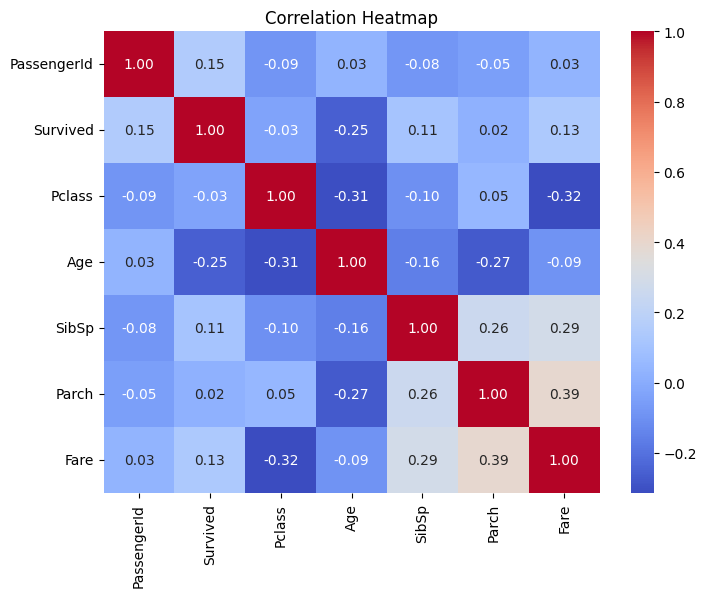

In [ ]:
#heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

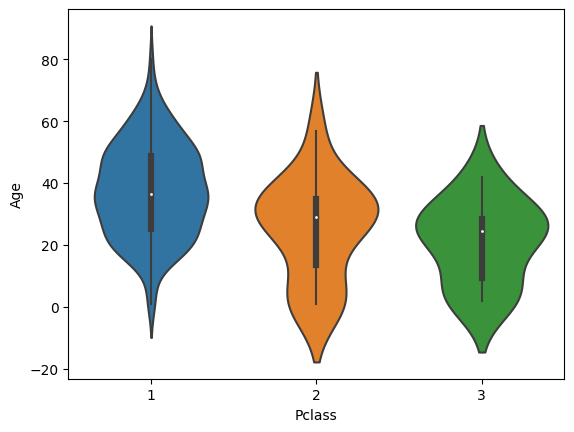

In [ ]:
# violin plot
sns.violinplot(x='Pclass', y='Age', data=df)

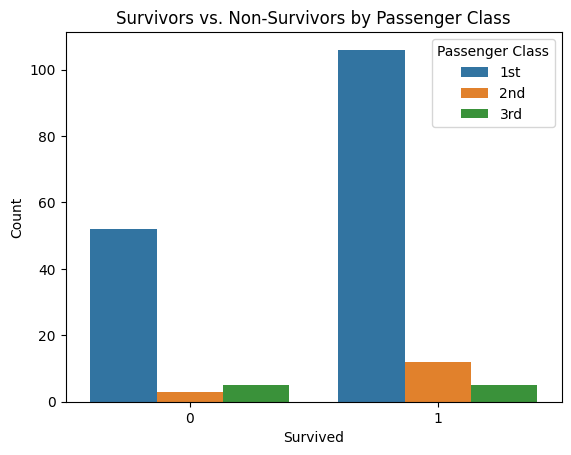

In [ ]:
#count plot


sns.countplot(x='Survived', hue='Pclass', data=df )
plt.title('Survivors vs. Non-Survivors by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.legend(title='Passenger Class', labels=['1st', '2nd', '3rd'])

plt.show()


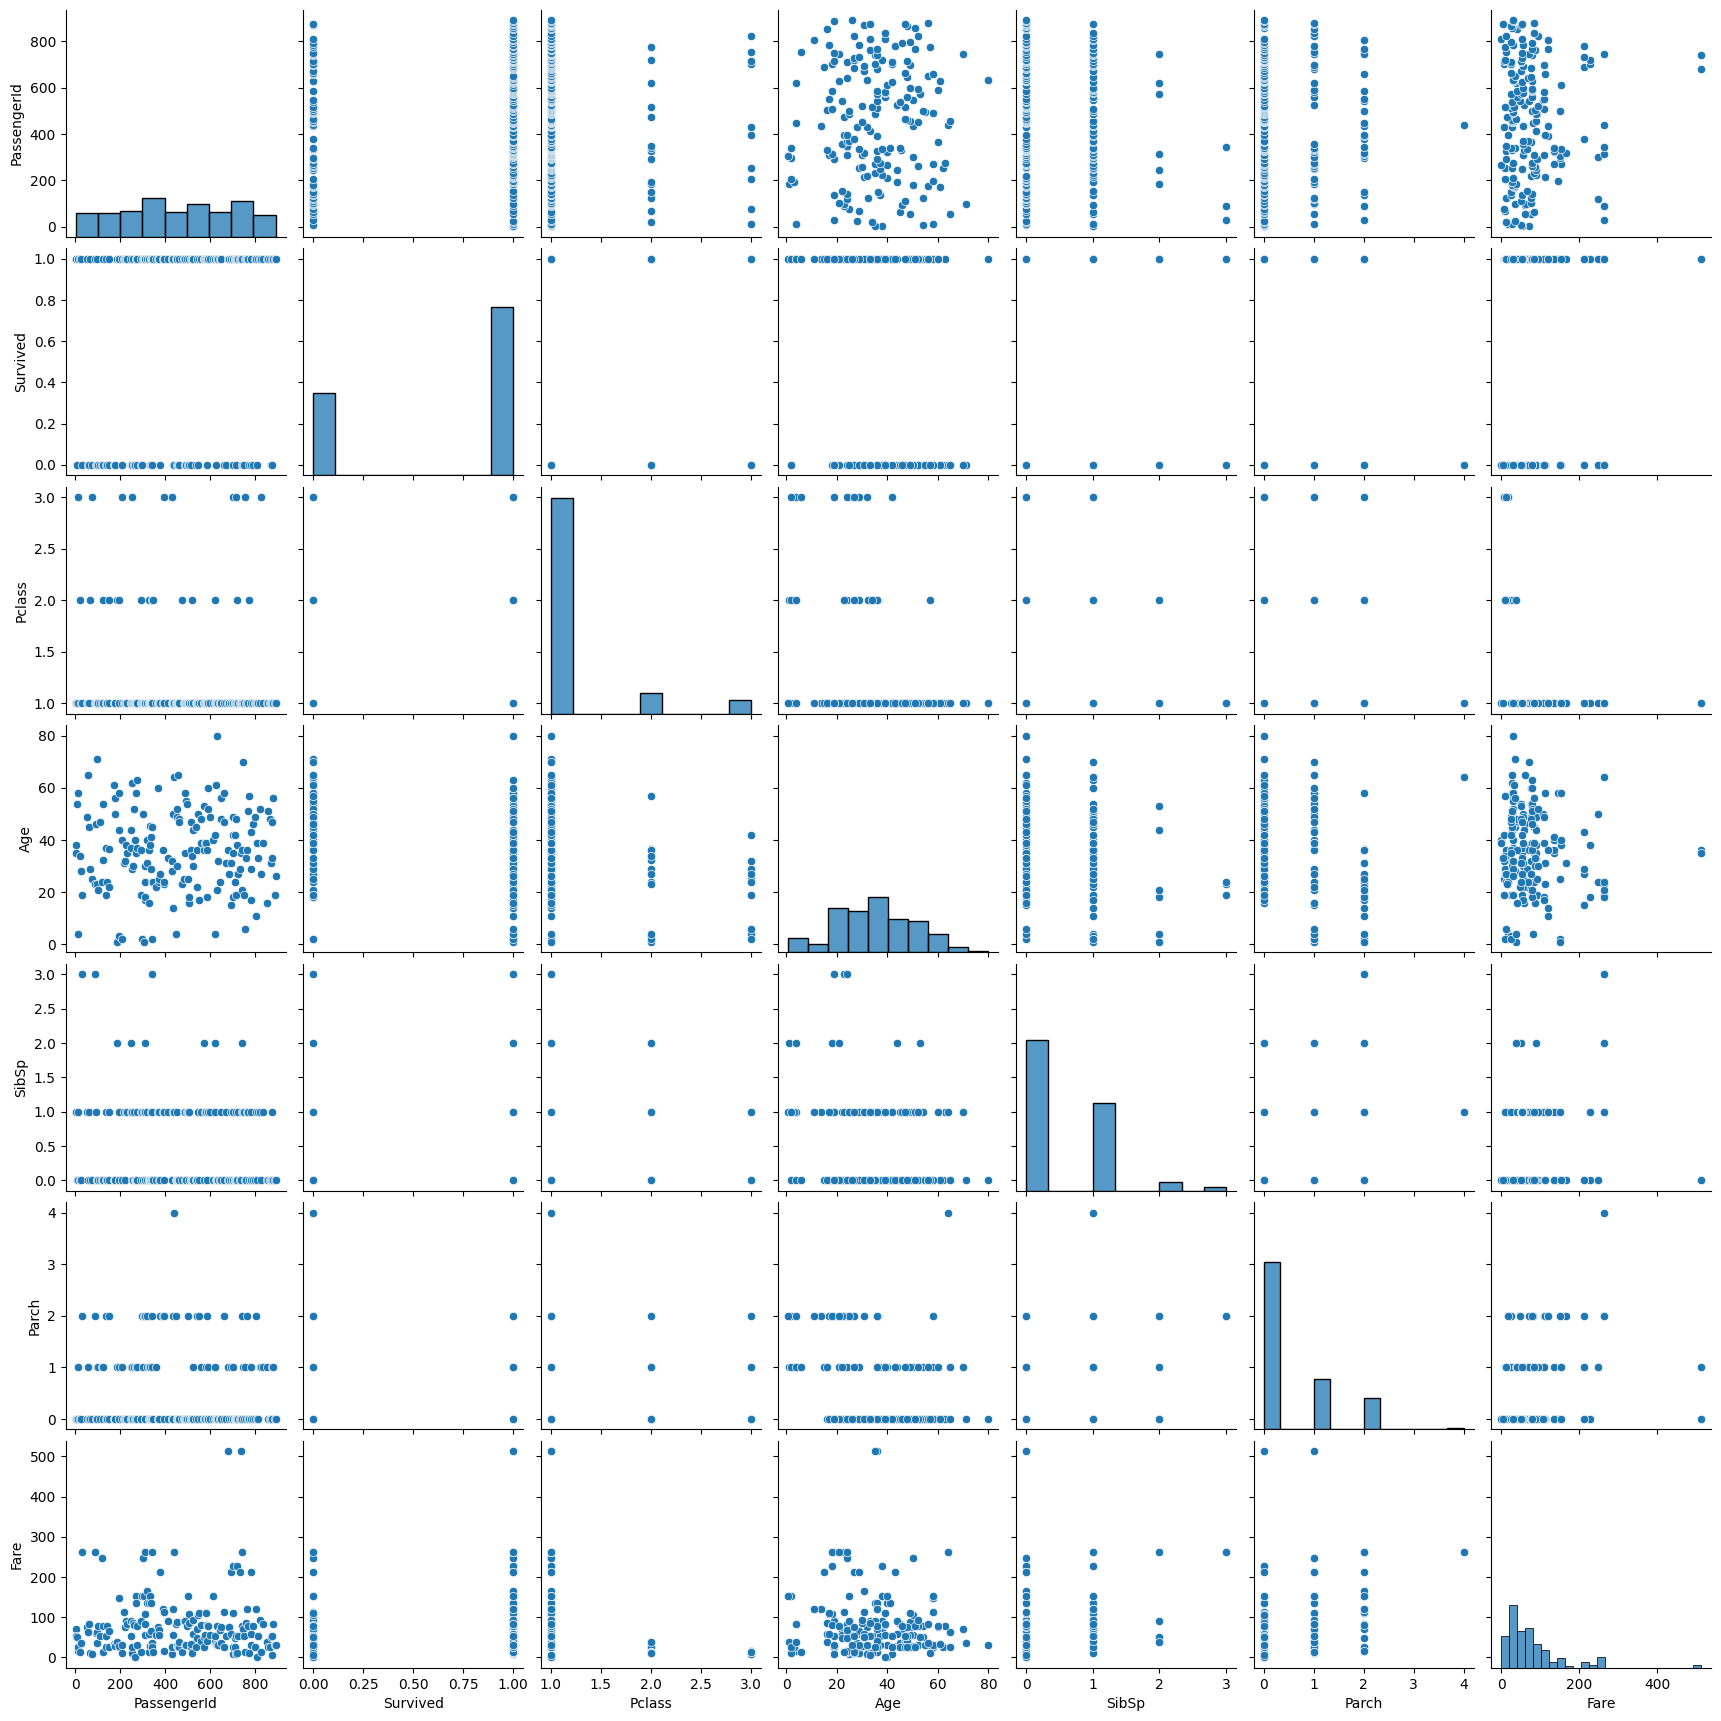

In [ ]:
#pair plot

sns.pairplot(df)

plt.show()

**Distribution of passengers by class:**


1.   1st class~160 passengers
2.   2nd class~20 passengers
3.   3rd class~10 passengers




**Age distribution of passengers:**


1.   Maximum people in the age group of 35-40
2.   Minimum people in the age group of 70-80



**Gender distribution among passengers**




*   There are more male passengers than females







**Variation of fare**

1.   Minimum fare~0
2.   Q1=25
3.   Q2=50
4.   Q3=80
5.   Maximum fare~160




The numerical values are age and fare and since thier correlation matrix is -0.09 i.e. close to 0, it indicates that their is no correlation between them.



**Variation of age and Pclass**


1.   Median age of passengers in 1st class=35
2.   Median age of passengers in 2nd class=30
3.   Median age of passengers in 3rd class=25



**Rate of survival**


*   People who were in 1st class had more survival chances


